In [1]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

In [3]:
#Load the dataset
dataset = pd.read_csv("calories.csv")

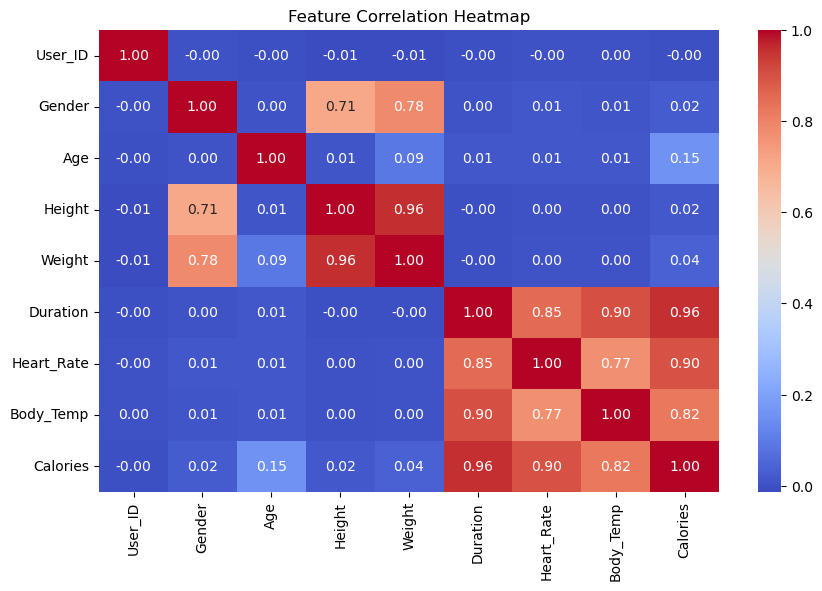

In [5]:
#Plotting The Data

# Convert Gender to Numeric
dataset["Gender"] = dataset["Gender"].map({"male": 1, "female": 0})

# Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(dataset.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

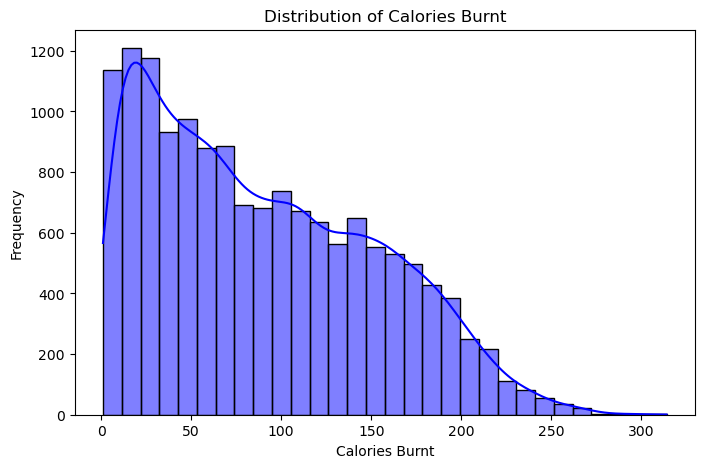

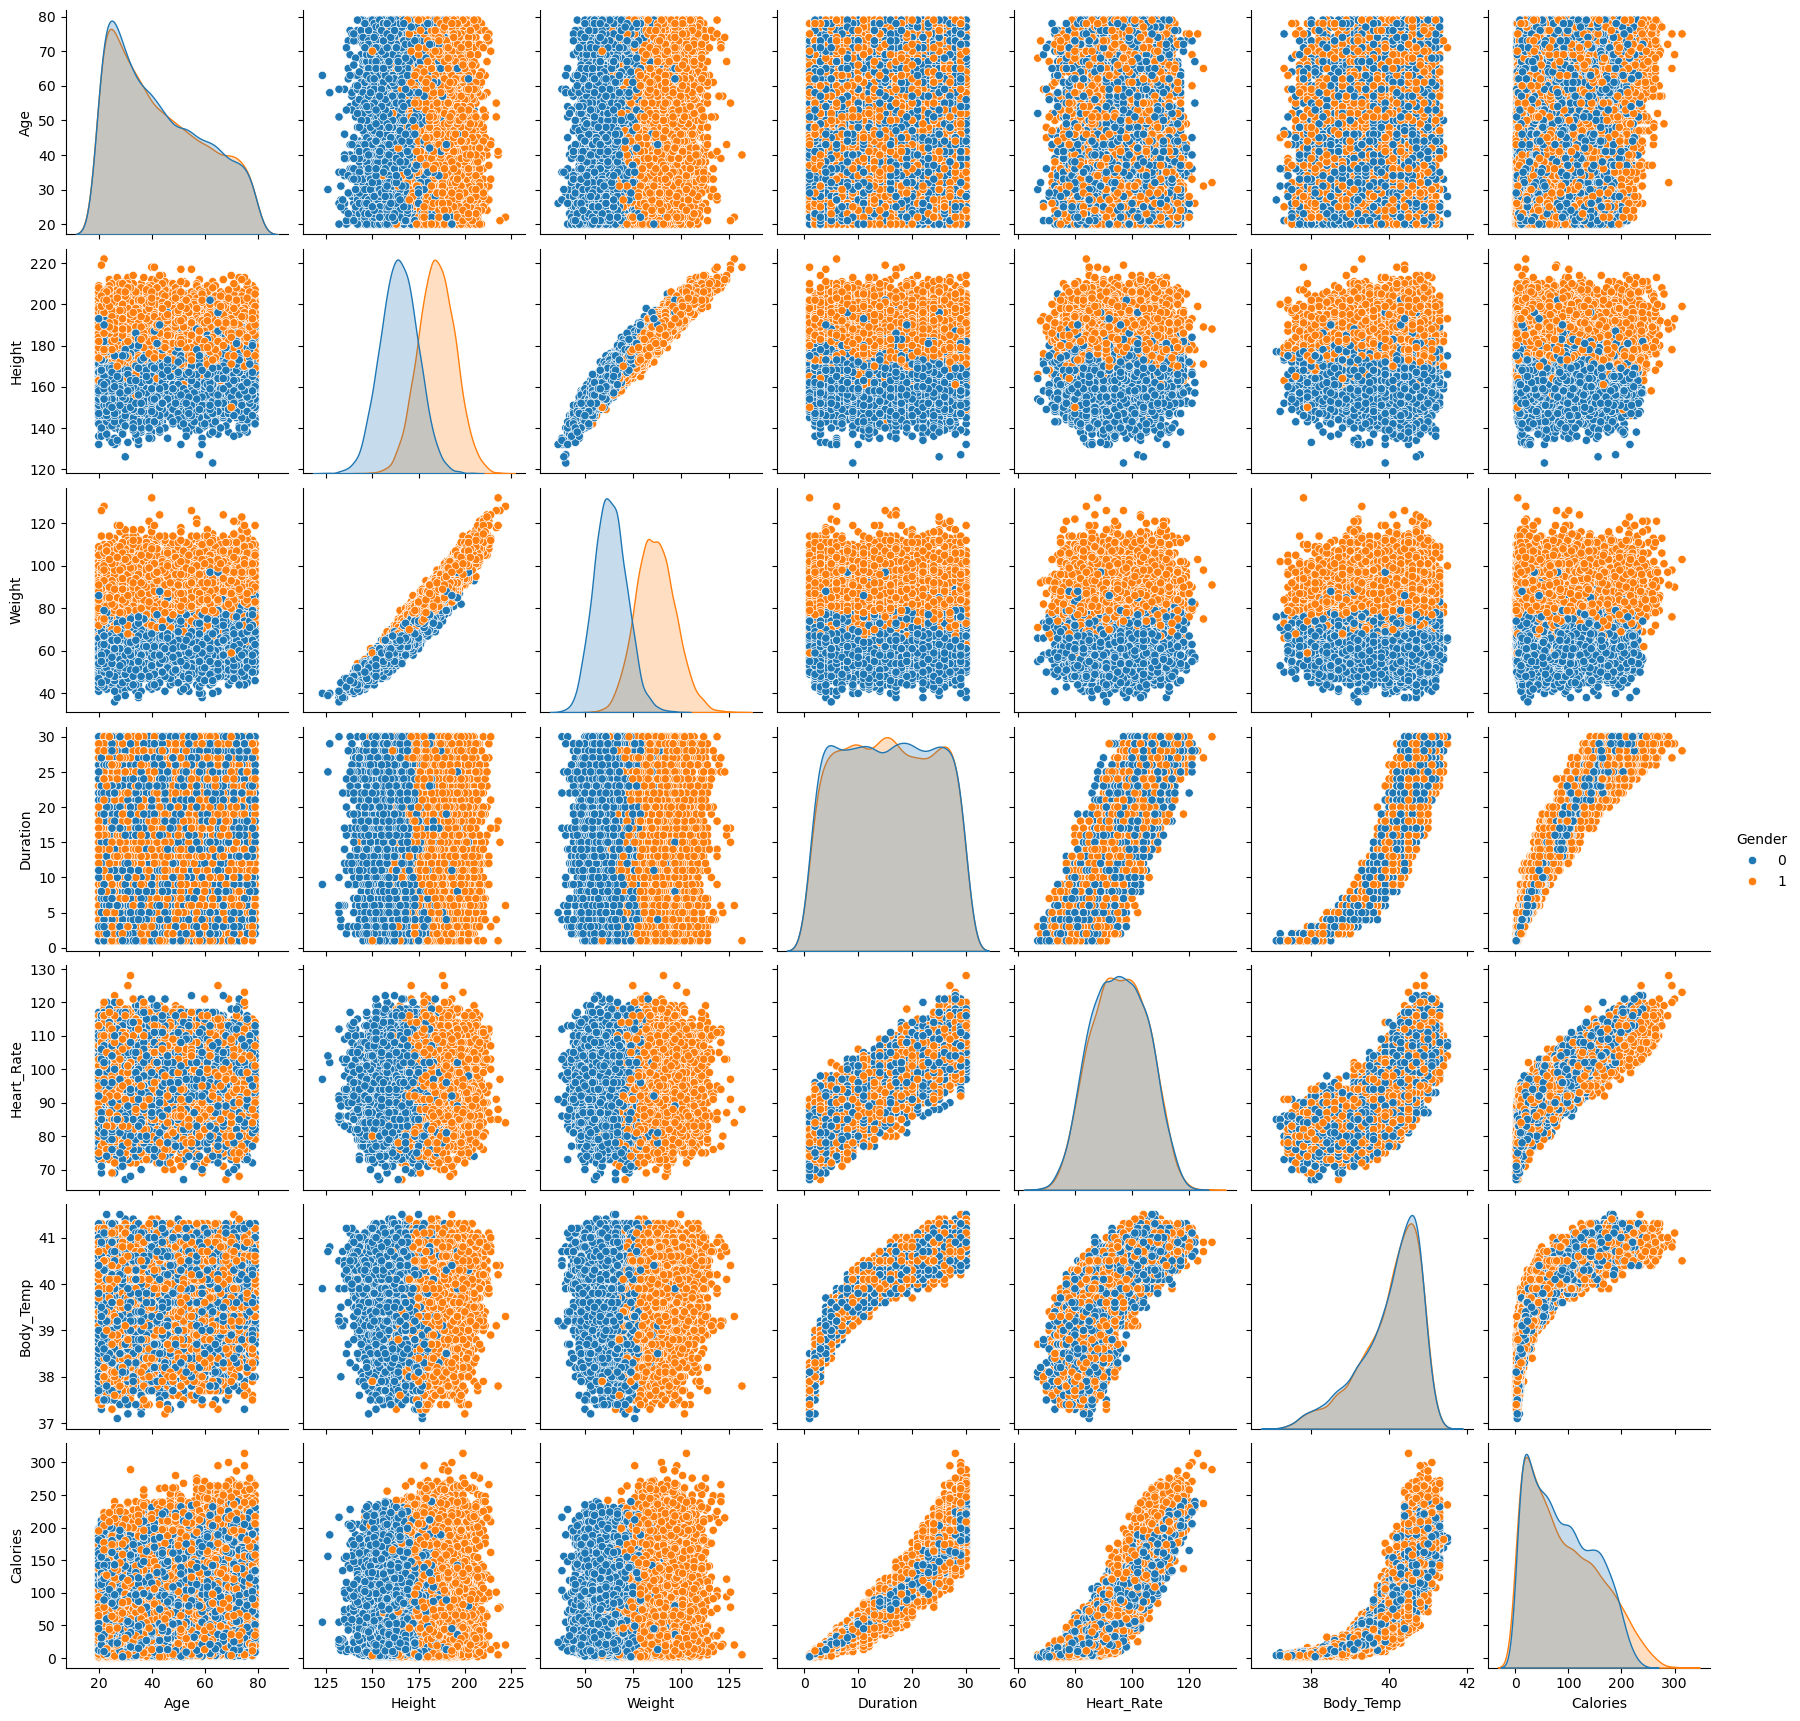

In [7]:
# Distribution of Calories Burnt
plt.figure(figsize=(8,5))
sns.histplot(dataset["Calories"], bins=30, kde=True, color="blue")
plt.title("Distribution of Calories Burnt")
plt.xlabel("Calories Burnt")
plt.ylabel("Frequency")
plt.show()

# Pairplot for Feature Relationships
sns.pairplot(dataset, vars=["Age", "Height", "Weight", "Duration", "Heart_Rate", "Body_Temp", "Calories"], hue="Gender")
plt.show()

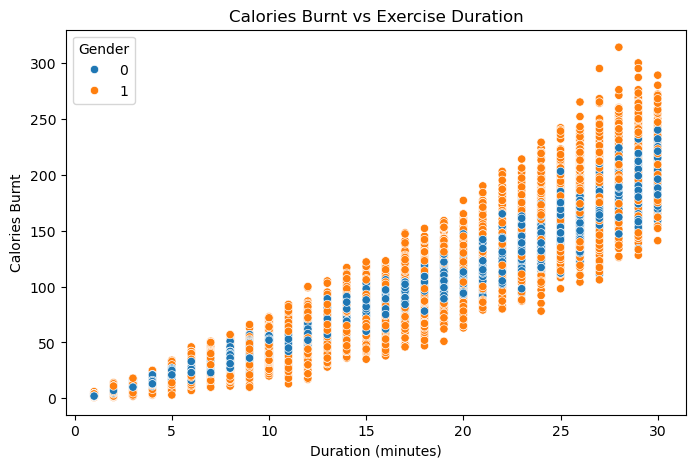

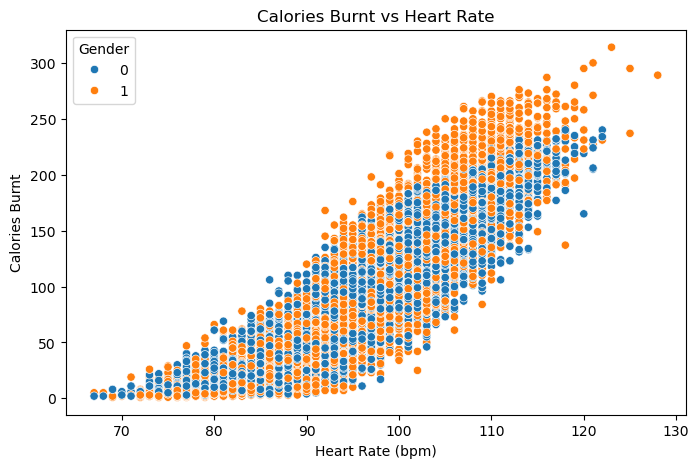

In [9]:
# Calories vs Duration
plt.figure(figsize=(8,5))
sns.scatterplot(x=dataset["Duration"], y=dataset["Calories"], hue=dataset["Gender"])
plt.title("Calories Burnt vs Exercise Duration")
plt.xlabel("Duration (minutes)")
plt.ylabel("Calories Burnt")
plt.show()

# Calories vs Heart Rate
plt.figure(figsize=(8,5))
sns.scatterplot(x=dataset["Heart_Rate"], y=dataset["Calories"], hue=dataset["Gender"])
plt.title("Calories Burnt vs Heart Rate")
plt.xlabel("Heart Rate (bpm)")
plt.ylabel("Calories Burnt")
plt.show()

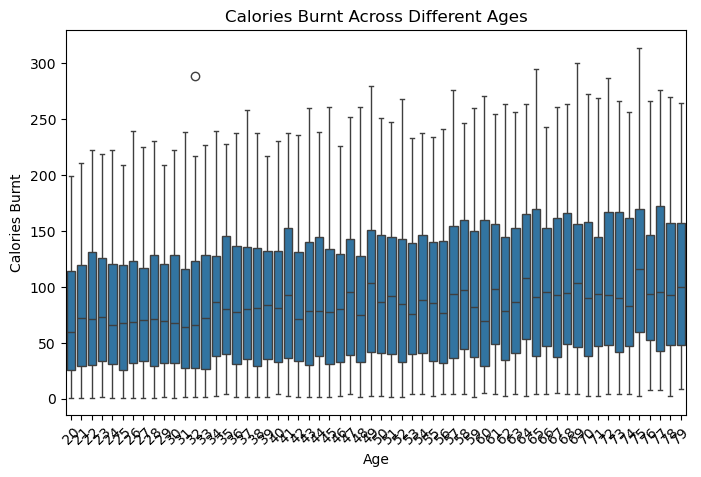

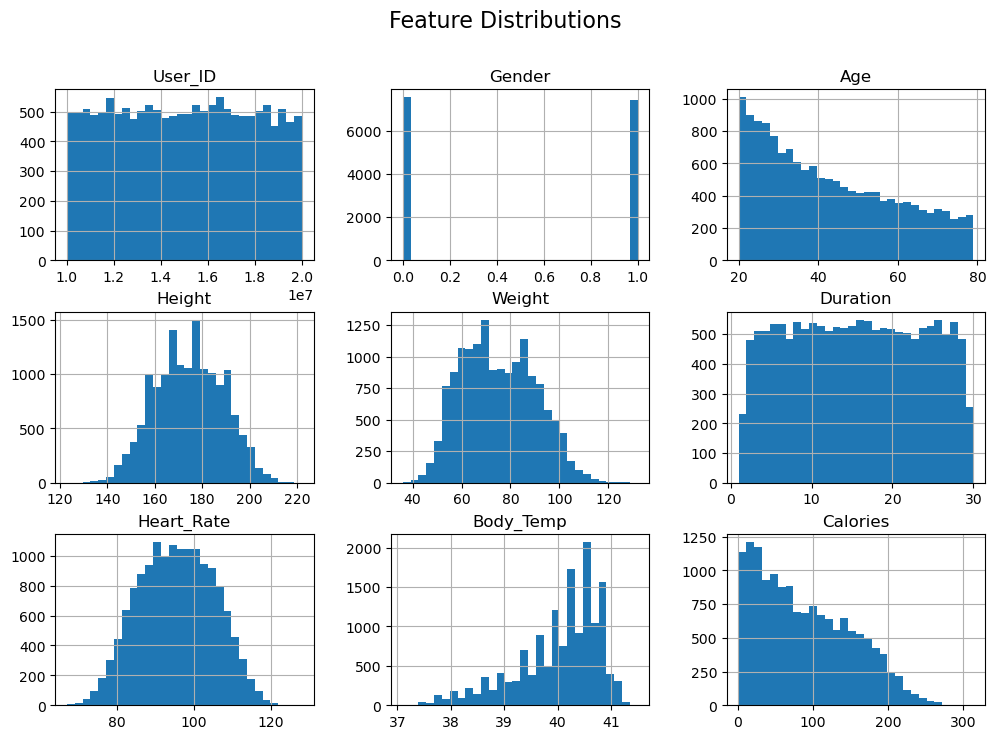

In [11]:
# Calories vs Age
plt.figure(figsize=(8,5))
sns.boxplot(x=dataset["Age"], y=dataset["Calories"])
plt.title("Calories Burnt Across Different Ages")
plt.xlabel("Age")
plt.ylabel("Calories Burnt")
plt.xticks(rotation=45)
plt.show()

# Feature Distributions
dataset.hist(figsize=(12,8), bins=30)
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

In [13]:
#loading training data

# Define Features (X) and Target (y)

# Shuffle the dataset to ensure randomness
# dataset = dataset.sample(frac=1, random_state=42).reset_index(drop=True)

# Define split sizes
total_samples = len(dataset)
train_end = int(0.8 * total_samples)  # 80% for training
cv_end = int(0.9 * total_samples)     # Next 10% for cross-validation

# Manual Split
train_data = dataset.iloc[:train_end]  # First 80%
cv_data = dataset.iloc[train_end:cv_end]  # Next 10%
test_data = dataset.iloc[cv_end:]  # Last 10%

# Separate Features (X) and Target (y)
X_train, y_train = train_data.drop(columns=["Calories", "User_ID"]), train_data["Calories"]
X_cv, y_cv = cv_data.drop(columns=["Calories", "User_ID"]), cv_data["Calories"]
X_test, y_test = test_data.drop(columns=["Calories", "User_ID"]), test_data["Calories"]

# Print dataset shapes
print("X_train shape:", X_train.shape)
print("X_cv shape:", X_cv.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_cv shape:", y_cv.shape)
print("y_test shape:", y_test.shape)


X_train shape: (12000, 7)
X_cv shape: (1500, 7)
X_test shape: (1500, 7)
y_train shape: (12000,)
y_cv shape: (1500,)
y_test shape: (1500,)


In [15]:
#Creating And Fitting the model

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [17]:
#View Parameters

b = linear_model.intercept_
w = linear_model.coef_
print(f"w = {w:}, b = {b:0.2f}")

w = [ -1.41962328   0.497894    -0.18089206   0.30301114   6.64962731
   1.98287231 -17.15426135], b = 471.74


In [19]:
#Calculating errors on training , test , and cv Sets

# Predict on train, CV, and test sets
y_train_pred = linear_model.predict(X_train)
y_cv_pred = linear_model.predict(X_cv)
y_test_pred = linear_model.predict(X_test)

# Function to calculate errors
def calculate_errors(y_true, y_pred, dataset_name):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)

    print(f"🔹 {dataset_name} Errors:")
    print(f"   - MAE  : {mae:.4f}")
    print(f"   - MSE  : {mse:.4f}")
    print(f"   - RMSE : {rmse:.4f}")
    print(f"   - R² Score : {r2:.4f}\n")

# Calculate errors for each set
calculate_errors(y_train, y_train_pred, "Training Set")
calculate_errors(y_cv, y_cv_pred, "Cross-Validation Set")
calculate_errors(y_test, y_test_pred, "Test Set")

🔹 Training Set Errors:
   - MAE  : 8.3057
   - MSE  : 126.4450
   - RMSE : 11.2448
   - R² Score : 0.9675

🔹 Cross-Validation Set Errors:
   - MAE  : 8.3889
   - MSE  : 129.7156
   - RMSE : 11.3893
   - R² Score : 0.9669

🔹 Test Set Errors:
   - MAE  : 8.6027
   - MSE  : 138.2951
   - RMSE : 11.7599
   - R² Score : 0.9652



# 🔹 Model Performance Analysis

## 🔹 Key Observations:

1. **High R² Score (~0.96-0.97) → Excellent Fit**
   - The model explains **96-97% of the variance** in the data, which is **very strong**.
   - A higher R² (closer to 1) means better predictions.

2. **Low MAE & RMSE → Small Prediction Errors**
   - **MAE (~8.3-8.6 kcal)** → On average, the model's predictions are only **8-9 kcal off**.
   - **RMSE (~11.2-11.7 kcal)** → Most errors are **within ~11-12 kcal**, which is quite low.

3. **Minimal Performance Drop Between Train, CV, and Test Sets**
   - **Train MAE = 8.30 | CV MAE = 8.38 | Test MAE = 8.60**
   - **RMSE follows a similar pattern (small increase)**
   - ✅ **No overfitting** → If the train error was **much lower** than test error, overfitting would be a concern.

---

## 🔹 Conclusion:
✅ **The model generalizes well and is highly accurate!** 🎯  
It should perform well in real-world calorie predictions. 🚀  

---

## 🔹 Possible Improvements:
- **Feature Engineering**  
  - Check if any new features (e.g., BMI, activity type) can improve accuracy.  
- **Hyperparameter Tuning**  
  - Optimize `LinearRegression()` by tweaking parameters.  

But overall, **The current model is already very strong!** 🔥


In [21]:
#Testing On RealWorld Examples

real_world_samples = pd.DataFrame({
    "Gender": [0],  #  1 = Male, 0 = Female
    "Age": [19],
    "Height": [165],  # cm
    "Weight": [76],   # kg
    "Duration": [30], # Exercise duration in minutes
    "Heart_Rate": [120],  # BPM
    "Body_Temp": [39.4]  # Celsius
})
predicted_calories = linear_model.predict(real_world_samples)

print(f"🔥 Predicted Calories Burned: {predicted_calories[0]:.2f} kcal")

🔥 Predicted Calories Burned: 235.94 kcal


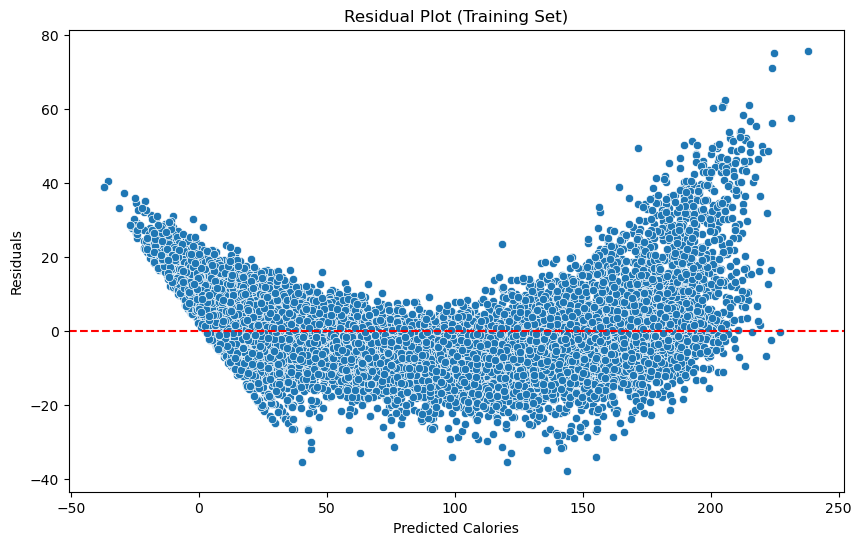

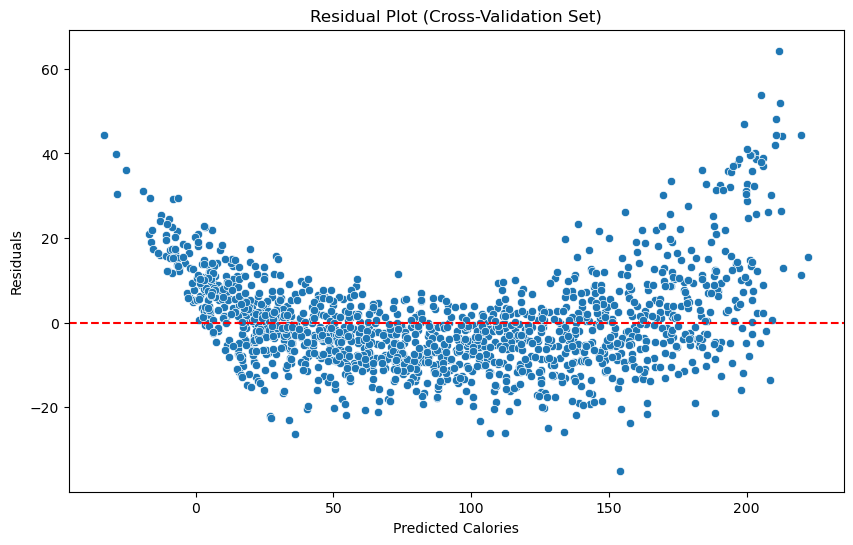

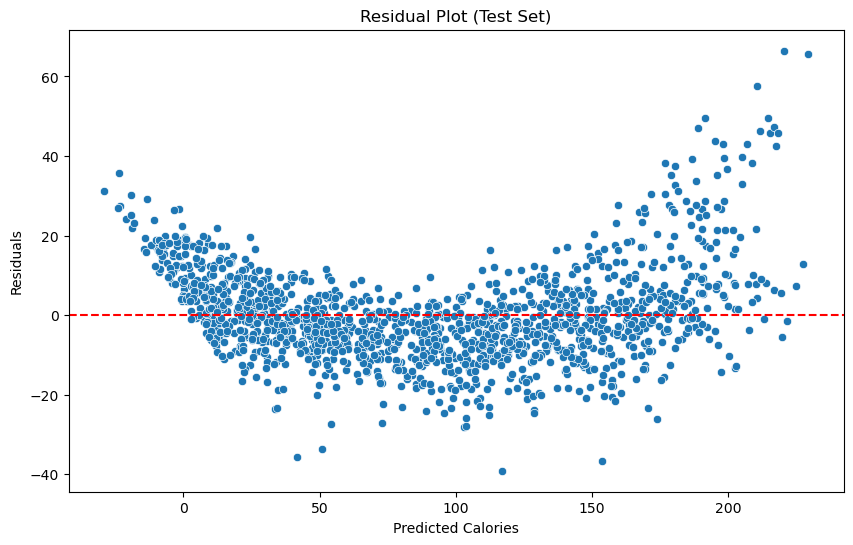

In [25]:
#Some Plots For Analyzing the model

# Calculate residuals
train_residuals = y_train - y_train_pred
cv_residuals = y_cv - y_cv_pred
test_residuals = y_test - y_test_pred

# Residual plot for training set
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_train_pred, y=train_residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residual Plot (Training Set)')
plt.xlabel('Predicted Calories')
plt.ylabel('Residuals')
plt.show()

# Residual plot for cross-validation set
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_cv_pred, y=cv_residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residual Plot (Cross-Validation Set)')
plt.xlabel('Predicted Calories')
plt.ylabel('Residuals')
plt.show()

# Residual plot for test set
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test_pred, y=test_residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residual Plot (Test Set)')
plt.xlabel('Predicted Calories')
plt.ylabel('Residuals')
plt.show()


In [ ]:
# Actual vs Predicted for Training Set
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_train_pred)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linestyle='--')
plt.title('Actual vs Predicted (Training Set)')
plt.xlabel('Actual Calories')
plt.ylabel('Predicted Calories')
plt.show()

# Actual vs Predicted for Cross-Validation Set
plt.figure(figsize=(10, 6))
plt.scatter(y_cv, y_cv_pred)
plt.plot([min(y_cv), max(y_cv)], [min(y_cv), max(y_cv)], color='red', linestyle='--')
plt.title('Actual vs Predicted (Cross-Validation Set)')
plt.xlabel('Actual Calories')
plt.ylabel('Predicted Calories')
plt.show()

# Actual vs Predicted for Test Set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Actual vs Predicted (Test Set)')
plt.xlabel('Actual Calories')
plt.ylabel('Predicted Calories')
plt.show()